# 项目简介
## 题目要求
利用海表面温度月平均资料sstmnmean.nc，进行以下数据分析并绘图。
(1) 对热带太平洋区域海温进行EOF(Empirical Orthogonal Function)分析，海温区域选取为-20~20°N、130~290°E，时间为1979~2021年的每年夏季(6~8月)。将EOF空间场的前两个模态绘制在一幅图上，要求使用一页多图方法绘制填色图，对图片进行修饰以达到一定程度的美观。

## 题目来源
2022年NUIST气象学专业《Linux和Python气象应用》课程考试
试题解析（在视频后半部分）：https://www.bilibili.com/video/BV1UL4y1A7mB?share_source=copy_web
有点粗糙，等我有空了再重新录一个嘻嘻

## 项目内容
美化&修改《热带太平洋区域海温(SST) EOF分析》
（涉及到cartopy，建议运行时使用【Python 3.9 气象数据分析】镜像）

## 配套教程视频
b站【啵啵鼠宝】，气象科研绘图系列1~5期

气象科研绘图1：把作业做成sci插图风格！
https://www.bilibili.com/video/BV1yY4y1E7z2?share_source=copy_web
本期内容简介：热带太平洋区域海温(SST) EOF分析存在的问题——从哪些角度去美化一张论文插图，让它接近sci插图的标准（？）

气象科研绘图2：一页多图&子图布局和美化
https://www.bilibili.com/video/BV1Ut4y1t7Zi?share_source=copy_web
本期内容简介：（1）Python一页多图绘制方法（2）子图布局和美化（3）修改&调整《热带太平洋区域海温(SST) EOF分析》

气象科研绘图3：地图叠加&cartopy基础应用
https://www.bilibili.com/video/BV1e3411F7JZ?share_source=copy_web
本期内容简介：（1）cartopy简介（2）cartopy基本操作&修改《热带太平洋区域海温(SST) EOF分析》

气象科研绘图4：等高线图contourf&colorbar
https://www.bilibili.com/video/BV1sB4y1H7Fn?share_source=copy_web
本期内容简介：（1）等高线图类简介&应用场景（2）颜色条colorbar简介（3）参数详解&修改热带太平洋区域海温(SST) EOF分析

气象科研绘图5：折线图plot&时间序列处理
https://www.bilibili.com/video/BV1xG411W7uB?share_source=copy_web
本期内容简介：（1）折线图plot简介&美化技巧（2）时间序列处理（3）参数详解&修改热带太平洋区域海温(SST) EOF分析（4）获取代码&数据

# 【练习版】Before 原始代码（已整理）

## Part A：无需修改

In [3]:
import netCDF4 as nc
import datetime as dt
import numpy as np
from eofs.standard import Eof
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cf

#取消警告输出
warnings.filterwarnings("ignore")

#导入文件
filename = r'C:/Users/LULU/Desktop/sstmnmean.nc'
f = nc.Dataset(filename)

#读取数据
lat = f.variables['lat'][34:55]
lon = f.variables['lon'][65:146]
time1 = list(f.variables['time'][:])
time_index = []
years = [i for i in range(1979,2022)]
months = [6,7,8]
dates = []
x = []
for year in years:
    for month in months:
        day = dt.datetime.strptime(str(year)+'-'+str(month)+'-1', '%Y-%m-%d')-dt.datetime.strptime('1800-1-1', '%Y-%m-%d')
        x.append(str(year)+'-'+str(month))
        dates.append(day.days)        
for day in dates:
    time_index.append(time1.index(day))
sst = f.variables['sst'][time_index,34:55,65:146]

#计算纬度权重
lat0 = np.array(lat)
coslat = np.cos(np.deg2rad(lat0))
wgts = np.sqrt(coslat)[..., np.newaxis]

#EOF
eof = Eof(sst,weights=wgts)
u_eof = eof.eofsAsCorrelation(neofs=2)
u_pc = eof.pcs(npcs=2, pcscaling=1)
u_var = eof.varianceFraction(neigs=2)

#画图网格
X,Y = np.meshgrid(lon,lat)

## Part B：按年计算时间系数（取一年中3个月时间系数的平均），为了后续修改ax2和ax4（折线图）

提示：第一模态的时间系数为u_pc[:,0]，第二模态的时间系数为u_pc[:,1]

## Part C：获取前2个模态的方差贡献，作为ax1和ax3（等高线填色图）的标题

提示：u_var[0],u_var[1]，方差贡献的单位为%

## Part D：在原来的【画图】部分的基础上进行修改和美化

修改建议：
（1）等高线填色图：
1）添加海岸线轮廓，设置投影方式
2）调整等值线间距，更好展示空间分布情况
3）经纬度标注需规范
3）添加颜色条colorbar
（2）折线图：
1）数据换成x轴：年份，y轴：按年计算的时间系数（原来为每年中的6-8月每月的时间系数）
2）使数据的正负及每年对应的时间系数的值更加直观
（3）整体要求：
1）为每张子图添加标题
2）为每张子图设计合理的长宽比例，进行排版和整体布局
3）图片展示的所有信息直观、清晰

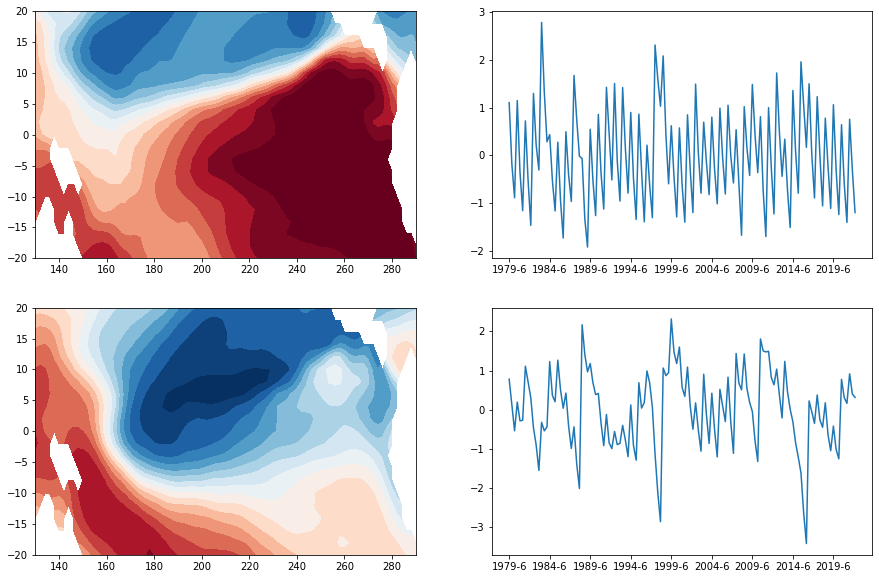

In [2]:
#画图
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax1.contourf(X,Y,u_eof[0,:,:], levels=np.arange(-0.8,0.9,0.1), extend = 'both',zorder=0, cmap=plt.cm.RdBu_r)
ax2 = plt.subplot(2,2,2)
ax2.plot(x,u_pc[:,0])
ax2.xaxis.set_major_locator(MultipleLocator(15))
ax3 = plt.subplot(2,2,3)
ax3.contourf(X,Y,u_eof[1,:,:], levels=np.arange(-0.8,0.9,0.1), extend = 'both',zorder=0, cmap=plt.cm.RdBu_r)
ax4 = plt.subplot(2,2,4)
ax4.plot(x,u_pc[:,1])
ax4.xaxis.set_major_locator(MultipleLocator(15))